In [1]:
from IPython.display import Image

# Introduction to NumPy and Pandas 

## Introduction to NumPy

* most fundamental third-party package for scientific computing in Python 
* multidimensional **array** data structures
* associated functions and methods to manipulate them. 
* Other third-party packages, including **pandas**, use NumPy arrays as backends for more specialized data structures


### Comparison to Python

* While Python comes with several container types (`list`,`tuple`,`dict`), 
* NumPy's arrays are implemented closer to the hardware, and are therefore more **efficient** than the built-in types.
* This is particularly true for large data, for which NumPy scales much better than Python's built-in data structures.
* NumPy arrays also retain a suite of associated functions and methods that allow for efficient *array-oriented* computing.

## Import Convention

* By convention numpy is imported

In [2]:
import numpy as np

## NumPy Arrays and Indexing

* You can index an array in the same way you can index Python lists using **slice notation**

In [3]:
lst = list(range(1000))
arr = np.arange(1000)

Here's what the array looks like

In [4]:
arr[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
arr[10:20]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [6]:
arr[10:20:2]

array([10, 12, 14, 16, 18])

In [7]:
type(arr)

numpy.ndarray

In [8]:
%timeit [i ** 2 for i in lst]

1000 loops, best of 3: 345 µs per loop


In [9]:
%timeit arr ** 2

The slowest run took 103.99 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.18 µs per loop


We can index arrays in the same ways as lists

In [10]:
arr[5:10]

array([5, 6, 7, 8, 9])

In [11]:
arr[-1]

999

### Arrays vs Lists

* arrays are **homogeneously typed** 
  * all elements of an array must be of the same type.  
  * we see why when we think about the memory layout
* lists can contain elements of arbitrary type

In [12]:
['a', 2, (1, 3)]

['a', 2, (1, 3)]

In [13]:
lst[0] = 'some other type'

In [14]:
lst[:3]

['some other type', 1, 2]

* We can't do this with an array

In [15]:
arr[0] = 'some other type'

ValueError: invalid literal for int() with base 10: 'some other type'

* The data type is contained in the `dtype` attribute

In [17]:
arr.dtype

dtype('int64')

* The dtype is fixed
* Other types will be cast to this type

In [18]:
arr[0] = 1.234

In [19]:
arr[:10]

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### What is an Array

* Sometimes it's useful to peak under the hood to fix ideas
* A block of memory with some extra information on how to intepret its contents

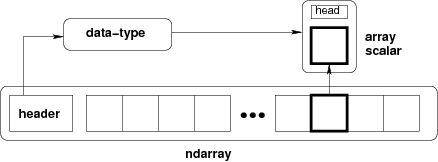

In [20]:
Image("https://docs.scipy.org/doc/numpy/_images/threefundamental.png")

### Array Creation

In [21]:
np.zeros(5, dtype=float)

array([ 0.,  0.,  0.,  0.,  0.])

In [22]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [23]:
np.zeros(5, dtype=complex)

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [24]:
np.ones(5, dtype=float)

array([ 1.,  1.,  1.,  1.,  1.])

* We have seen how the `arange` function generates an array for a range of integers.
* `linspace` and `logspace` functions to create linearly and logarithmically-spaced **grids** respectively, with a fixed number of points and including both ends of the specified interval:

In [25]:
np.linspace(0, 1, num=5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [26]:
np.logspace(1, 4, num=4)

array([    10.,    100.,   1000.,  10000.])

### Random Number Generation

Finally, it is often useful to create arrays with random numbers that follow a specific **distribution**.  The `np.random` module contains a number of functions that can be used to this effect, for example this will produce an array of 5 random samples taken from a **standard normal** distribution (0 mean and variance 1) $ X \sim N(0, 1) $:

$$f(x \mid \mu=0, \sigma=1) = \sqrt{\frac{1}{2\pi \sigma^2}} \exp\left\{ -\frac{x^2}{2\sigma^2} \right\}$$ 

In [27]:
np.random.randn(5)

array([-0.11317491, -0.50248579,  0.3356892 ,  0.86009582, -0.07478182])

$X \sim N(9, 3)$

In [28]:
norm10 = np.random.normal(loc=9, scale=3, size=10)

## Exercise: Random numbers

Generate a NumPy array of 1000 random numbers sampled from a Poisson distribution, with parameter `lam=5`. What is the modal value in the sample?

In [ ]:
# %load solutions/random_number.py
import numpy as np

y = np.random.poisson(lam=5, size=1000)
bins = np.bincount(y)
bins.argmax()


## Index Arrays

* Above we showed how to index with numbers and **slices**
* NumPy indexing is much more powerful than Python indexing
* You can index with other arrays
  * Boolean arrays
  * Integer arrays

Consider for example that in the array `norm10` we want to replace all values above 9 with the value 0.  We can do so by first finding the *mask* that indicates where this condition is `True` or `False`:

### Boolean Indexing

In [30]:
mask = norm10 > 9
mask

array([False,  True, False, False, False,  True, False, False,  True, False], dtype=bool)

In [31]:
norm10[mask]

array([ 12.55145136,  11.24173981,   9.44734301])

### Integer Indexing

* Likewise you can index with integer arrays

In [32]:
norm10[[1, 4, 6]]

array([ 12.55145136,   7.98275215,   5.43212587])

### Asssignment

* This form of indexing is known as **fancy-indexing**
* You can use fancy-indexing for assignment
  * This is particularly useful for assignment given some condition

In [33]:
norm10[norm10 > 9] = 0

In [34]:
norm10

array([ 4.96536279,  0.        ,  5.98652535,  6.45118575,  7.98275215,
        0.        ,  5.43212587,  6.81338361,  0.        ,  7.21862985])

In [35]:
norm10[[1, 4, 7]] = 10

In [36]:
norm10

array([  4.96536279,  10.        ,   5.98652535,   6.45118575,
        10.        ,   0.        ,   5.43212587,  10.        ,
         0.        ,   7.21862985])

### Copies vs Views

* This is a common **gotcha** for people new to NumPy
* While lvalue fancy-indexing in the case of assignment does not copy
  * Just `__setitem__`
* rvalue fancy-indexing produces a copy not a view
  * `__getitem__` followed by `__setitem__`

* When we use slice notation to look at part of an array, it produces a **view**
* That is, it points to the same memory of the original array

In [37]:
x = np.arange(10)

In [38]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
y = x[::2]
y

array([0, 2, 4, 6, 8])

In [40]:
y[3] = 100
y

array([  0,   2,   4, 100,   8])

In [41]:
x

array([  0,   1,   2,   3,   4,   5, 100,   7,   8,   9])

* This, however, produces a **copy**
* Operating on the copy will not affect the original array

In [42]:
a = norm10[[0, 1, 5]]

In [43]:
a

array([  4.96536279,  10.        ,   0.        ])

In [44]:
a[:] = -10

In [45]:
a

array([-10., -10., -10.])

In [46]:
norm10

array([  4.96536279,  10.        ,   5.98652535,   6.45118575,
        10.        ,   0.        ,   5.43212587,  10.        ,
         0.        ,   7.21862985])

### Exercise

Create an array `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]` without typing the values by hand. Assign 100 to elements 2 to 5 (zero-index). Print the array.


Create the same array as in step one above. Create an array from a slice of elements 2 to 5. Assign 100 to the slice. *Hint* try `[:]` to address all of the *elements* of an array. Print the original array and the slice.

In [ ]:
# [Solution here]

In [ ]:
%load solutions/copies_vs_views.py

## Multidimensional Arrays

* NumPy can create arrays of aribtrary dimensions, and all the methods illustrated in the previous section work with more than one dimension. 
* For example, a list of lists can be used to initialize a two dimensional array:

In [ ]:
samples_list = [[632, 1638, 569, 115], [433,1130,754,555]]
samples_array = np.array(samples_list)
samples_array.shape

In [ ]:
print(samples_array)

With two-dimensional arrays we start seeing the convenience of NumPy data structures: while a nested list can be indexed across dimensions using consecutive `[ ]` operators, multidimensional arrays support a more natural indexing syntax with a single set of brackets and a set of comma-separated indices:

In [ ]:
samples_list[0][1]

In [ ]:
samples_array[0,1]

Most of the array creation functions listed above can be passed multidimensional shapes. For example:

In [ ]:
np.zeros((2,3))

In [ ]:
np.random.normal(10, 3, size=(2, 4))

In fact, an array can be **reshaped** at any time, as long as the total number of elements is unchanged.  For example, if we want a 2x4 array with numbers increasing from 0, the easiest way to create it is via the array's `reshape` method.

In [ ]:
arr = np.arange(8).reshape(2,4)
arr

With multidimensional arrays, you can also use slices, and you can mix and match slices and single indices in the different dimensions (using the same array as above):

In [ ]:
arr[1, 2:4]

In [ ]:
arr[:, 2]

If you only provide one index, then you will get the corresponding row.

In [ ]:
arr[1]

Now that we have seen how to create arrays with more than one dimension, it's a good idea to look at some of the most useful **properties and methods** that arrays have.  The following provide basic information about the size, shape and data in the array:

In [ ]:
print('Data type                :', samples_array.dtype)
print('Total number of elements :', samples_array.size)
print('Number of dimensions     :', samples_array.ndim)
print('Shape (dimensionality)   :', samples_array.shape)
print('Memory used (in bytes)   :', samples_array.nbytes)

Arrays also have many useful methods, some especially useful ones are:

In [ ]:
print('Minimum and maximum             :', samples_array.min(), samples_array.max())
print('Sum, mean and standard deviation:', samples_array.sum(), samples_array.mean(), samples_array.std())

For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [ ]:
samples_array.sum(axis=0)

In [ ]:
samples_array.sum(axis=1)

* Notice that summing over the rows returned a 1d array above.
* If you want to preserve the dimensions use the `keepdims` keyword

In [ ]:
samples_array.sum(axis=1, keepdims=True)

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [ ]:
samples_array.T

There is a wide variety of methods and properties of arrays.       

In [ ]:
[attr for attr in dir(samples_array) if not attr.startswith('__')]

### What is a Multi-Dimensional Array

* memory is a linear address space
* by adding information on `shape` and `strides` we can interpet bytes laid out linearly in memory as a multidimensional object

In [ ]:
Image('https://ipython-books.github.io/images/layout.png')

### Exercises: Matrix Creation

Generate the following structure as a numpy array, without typing the values by hand. Then, create another array containing just the 2nd and 4th rows.

        [[1,  6, 11],
         [2,  7, 12],
         [3,  8, 13],
         [4,  9, 14],
         [5, 10, 15]]

In [ ]:
%load solutions/matrix_creation.py

## Array Operations, Methods, and Functions

In [ ]:
sample1 = np.array([632, 1638, 569, 115])
sample2 = np.array([433,1130,754,555])

sample_sum = sample1 + sample2

In [ ]:
np.array([632, 1638, 569, 115])

This includes the multiplication operator -- it does not perform matrix multiplication, as is the case in Matlab, for example:




In [ ]:
print('{0} X {1} = {2}'.format(sample1, sample2, sample1 * sample2))

In Python 3.5, you can use the `@` operator to get the inner product (or matrix multiplication) (!)

In [ ]:
print('{0} . {1} = {2}'.format(sample1, sample2, sample1 @ sample2))

* this implies that the dimension of the arrays for each operation must match in size,
* numpy will **broadcast** dimensions when possible
* For example, suppose that you want to add the number 1.5 to each element arr1
* We achieve this by **broadcasting**

In [ ]:
sample1 + 1.5

In this case, numpy looked at both operands and saw that the first was a one-dimensional array of length 4 and the second was a scalar, considered a zero-dimensional object. The broadcasting rules allow numpy to:

* create new array of length 1
* extend the array to match the size of the corresponding array

So in the above example, the scalar 1.5 is effectively cast to a 1-dimensional array of length 1, then stretched to length 4 to match the dimension of arr1. After this, element-wise addition can proceed as now both operands are one-dimensional arrays of length 4.

This broadcasting behavior is powerful, especially because when NumPy broadcasts to create new dimensions or to stretch existing ones, it doesn't actually replicate the data. In the example above the operation is carried as if the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created. This saves memory and improves the performance of operations.

When broadcasting, NumPy compares the sizes of each dimension in each operand. It starts with the trailing dimensions, working forward and creating dimensions as needed to accomodate the operation. Two dimensions are considered compatible for operation when:

* they are equal in size
* one is scalar (or size 1)

If these conditions are not met, an exception is thrown, indicating that the arrays have incompatible shapes.

In [ ]:
sample1 + np.array([7,8])

In [ ]:
b = np.array([10, 20, 30, 40])

bcast_sum = sample1 + b

In [ ]:
print('{0}\n\n+ {1}\n{2}\n{3}'.format(sample1, b, '-'*21, bcast_sum))

In [ ]:
c = np.array([-100, 100])
sample1 + c

Remember that matching begins at the **trailing** dimensions. Here, c would need to have a trailing dimension of 1 for the broadcasting to work. We can augment arrays with dimensions on the fly, by indexing it with a np.newaxis object, which adds an "empty" dimension:

In [ ]:
cplus = c[:, np.newaxis]
cplus

In [ ]:
cplus.shape

In [ ]:
sample1 + cplus

In [ ]:
sample1[:, np.newaxis] + c

### Exercises: Array Manipulation

Divide each column of the array:

```python
a = np.arange(25).reshape(5, 5)
```

elementwise with the array 

```python
b = np.array([1., 5, 10, 15, 20])
```

In [ ]:
# [Solution here]

In [ ]:
%load solutions/broadcasting.py

### What Else

* NumPy provides *much* more functionality than what we covered here
* For example, facilities for **linear algebra**, **FFTs**, **polynomials**, and **unit testing** for floating point

## Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- **Tabular** data with heterogeneously-typed columns, as you might find in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series** data.
- Arbitrary **matrix** data with row and column labels

Virtually any statistical dataset, labeled or unlabeled, can be converted to a pandas data structure for cleaning, transformation, and analysis.


### Key features
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### Import Convention

In [ ]:
import pandas as pd

## Pandas Series

* A pandas Series is a generationalization of 1d numpy array
* A series has an *index* that labels each element in the vector.
* A `Series` can be thought of as an ordered key-value store.

In [ ]:
counts = pd.Series([632, 1638, 569, 115])
counts

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [ ]:
counts.values

### Index Object

Pandas provides a labeled index to access the rows

In [ ]:
counts.index

We can assign meaningful labels to the index, if they are available:

In [ ]:
bacteria = pd.Series([632, 1638, 569, 115], 
                     index=['Firmicutes', 'Proteobacteria', 
                            'Actinobacteria', 'Bacteroidetes'])

bacteria

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [ ]:
np.log(bacteria)

* Creation from a dict
* Returned in key-sorted order

In [ ]:
bacteria_dict = {
    'Firmicutes': 632, 
    'Proteobacteria': 1638,
    'Actinobacteria': 569, 
    'Bacteroidetes': 115
}

pd.Series(bacteria_dict)

## Pandas DataFrames

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet.

In [ ]:
data = pd.DataFrame({'value': [632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient': [1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum': ['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
                                'Bacteroidetes', 'Firmicutes', 'Proteobacteria',
                                'Actinobacteria', 'Bacteroidetes']})
data

* We often will want to peak at the first few rows of a DataFrame
* You can use `head` to do this

In [ ]:
data.head()

### Columns as an Index

The first axis of a DataFrame also has an index that represent the labeled columns

In [ ]:
data.columns

## Reading and Writing Files

* Pandas provides sophisticated I/O functionality
* `read_csv` is a highly optimized csv reader

In [ ]:
vessels = pd.read_csv("../data/AIS/vessel_information.csv")
vessels.head()

### Exercises

* Read a single file `../data/NationalFoodSurvey/NFS_1974.csv`

In [ ]:
%load solutions/read_nfs_1974.py

---